<a href="https://colab.research.google.com/github/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/blob/main/01_Signal_Processing_Ciani%2BDalle_Rive_Prieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [84]:
# Data
import pandas as pd

# Math
import numpy as np

# Graficas
import matplotlib.pyplot as plt

# Manejo de directorios
import shutil
import os

# Funciones

In [85]:
def graficar_t_VS_muestras(tiempo, datos, xlabel='Tiempo (s)', ylabel='Amplitud',xlim=None, ylim=None, titulo='Gráfico', grid=True):
    """
    Función para graficar datos utilizando matplotlib.

    Args:
        tiempo (list or array): Datos del eje x (tiempo).
        datos (list or array): Datos del eje y (muestras).
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Valor'.
        titulo (str): Título del gráfico. Default 'Gráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, datos)
    plt.xlabel(xlabel)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

def fft(signals, fs, labels=None, xlim=None, ylim=None, xlabel='Frecuencia (Hz)', ylabel='Magnitud', titulo='Transformada de Fourier', grid=True):
    """
    Calcula y grafica la FFT de una o más señales.

    Args:
        signals (list of arrays): Lista de señales en el dominio del tiempo.
        fs (float): Frecuencia de muestreo.
        labels (list of str): Lista de etiquetas para las señales. Default None.
        xlim (tuple): Límites del eje x (min, max). Default None.
        ylim (tuple): Límites del eje y (min, max). Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Frecuencia (Hz)'.
        ylabel (str): Etiqueta para el eje y. Default 'Magnitud'.
        titulo (str): Título del gráfico. Default 'Transformada de Fourier'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))

    # Si no se proporcionan etiquetas, crear etiquetas predeterminadas
    if labels is None:
        labels = [f'Señal {i+1}' for i in range(len(signals))]

    for i, signal in enumerate(signals):
        # Calcula la FFT de la señal
        fft_signal = np.fft.fft(signal)

        # Calcula la magnitud de la FFT
        magnitude = np.abs(fft_signal)

        # Calcula la frecuencia correspondiente a cada componente de la FFT
        freqs = np.fft.fftfreq(len(signal), 1/fs)

        # Solo usamos la mitad del espectro, ya que la otra mitad es simétrica
        half_n = len(signal) // 2
        frequencies = freqs[:half_n]
        magnitudes = magnitude[:half_n]

        # Graficar la magnitud de la FFT
        plt.plot(frequencies, magnitudes, label=labels[i])

    # Etiquetas y título
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)

    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Mostrar la leyenda
    plt.legend()

    plt.show()

def graficar_multisignales(tiempos_list, datos_list, labels=None, xlabel='Tiempo (s)', ylabel='Amplitud', titulo='Multigráfico', grid=True):
    """
    Función para graficar múltiples señales en un solo gráfico utilizando matplotlib.

    Args:
        tiempos_list (list of arrays): Lista de vectores de tiempo, uno para cada señal.
        datos_list (list of arrays): Lista de señales (datos) a graficar.
        labels (list of str): Lista de etiquetas para cada señal. Default None.
        xlabel (str): Etiqueta para el eje x. Default 'Tiempo (s)'.
        ylabel (str): Etiqueta para el eje y. Default 'Amplitud'.
        titulo (str): Título del gráfico. Default 'Multigráfico'.
        grid (bool): Si se muestra la grilla o no. Default True.
    """
    plt.figure(figsize=(10, 4))

    # Graficar cada señal con su respectivo vector de tiempo
    for i, (tiempos, datos) in enumerate(zip(tiempos_list, datos_list)):
        if labels and i < len(labels):
            plt.plot(tiempos, datos, label=labels[i])
        else:
            plt.plot(tiempos, datos)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    if labels:
        plt.legend()
    plt.grid(grid)
    plt.show()


# Información de la LDR

Un fotoresistor o LDR (light-dependent resistor),está conformado por un semicondiuctor (sulfuro de Cadmio) el cual al recibir los fotones incidentes de la luz, provoca que los electrones pasen a la banda de conducción, disminuyendo así, la resistencia del componenete.

La resistencia de estos componentes suele variar entre: 50 ohms (plena luz) y 1M ohms (oscuridad).  

En cuanto a la medición de la iluminancia, éste sensor no sería preciso debido a su gran variación de resistencia respecto a la temperatura y a la longitud de onda de la señal:

# Proceso de toma de la señal

A través del archivo brindado por la cátedra, se crearon 3 videos. Estos videos estan formados por imágenes que varían su color en una escala de grises. Se seleccionaron 60 fps para las 3 señales, y cada una varía en la cantidad de imágenes que utilizan para realizar el video. Se crearon señales con 10, 30 y 60 imágenes.

Dicha variación en el video se obtuvo a través de un fotorresistor, el cual fue colocado sobre la pantalla que reproducía el video, y con la habitación a oscuras, para garantizar una mejor toma de la señal.

Una vez obtenidas las 3 señales, se cargaron a GitHub para luego poder importarlas a Google Colab.

# Importación de la señal

In [86]:
# Path del repo en la carpeta de drive
repo_path = 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'

if os.path.exists(repo_path):
    shutil.rmtree(repo_path)

# Clonamos el repo para descargar las muestras
!git clone https://github.com/alex20022000/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto

Cloning into 'Signal_Processing_Project_Ciani-Dalle_Rive_Prieto'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 123 (delta 47), reused 74 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 2.10 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [87]:
data_1 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/08-ldr-fs_100Hz-60imgs-60fps.json")
data_2 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/06-ldr-fs_100Hz-50imgs-60fps.json")
data_3 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/05-ldr-fs_100Hz-40imgs-60fps.json")
data_4 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/04-ldr-fs_100Hz-30imgs-60fps.json")
data_5 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/03-ldr-fs_100Hz-20imgs-60fps.json")
data_6 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/02-ldr-fs_100Hz-10imgs-60fps.json")
#data_7 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/06-ldr-fs_100Hz-50imgs-60fps.json")
data_8 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/09-ldr-fs_100Hz-60imgs-90fps.json")
data_9 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/10-ldr-fs_100Hz-60imgs-120fps.json")
data_10 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/11-ldr-fs_100Hz-60imgs-240fps.json")
data_11 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/12-ldr-fs_100Hz-70imgs-60fps.json")
data_12 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/13-ldr-fs_500Hz-60imgs-60fps.json")
data_13 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/14-ldr-fs_500Hz-30imgs-60fps.json")
data_14 = pd.read_csv("/content/Signal_Processing_Project_Ciani-Dalle_Rive_Prieto/Lectura/15-ldr-fs_500Hz-10imgs-60fps.json")
data_1.head()

,timestamp(ms),LDR,Unnamed: 2
0,1.723158e+09,196,NaN
1,1.723158e+09,192,NaN
2,1.723158e+09,211,NaN
3,1.723158e+09,208,NaN
4,1.723158e+09,193,NaN


# Análisis de los datos y gráficos de las señales

Inicialmente se grafica cada señal de manera individual. Para poder obtener un gráfico claro, fue necesario cortar la señal para quedarnos únicamente con la parte que nos interesa, que es la toma de variación en el LDR. Tanto el inicio como el fin (donde no había datos útiles) fueron suprimidos.

In [88]:
# Borramos columna unnamed
data_1.drop(columns=['Unnamed: 2'], inplace=True)
data_2.drop(columns=['Unnamed: 2'], inplace=True)
data_3.drop(columns=['Unnamed: 2'], inplace=True)
data_4.drop(columns=['Unnamed: 2'], inplace=True)
data_5.drop(columns=['Unnamed: 2'], inplace=True)
data_6.drop(columns=['Unnamed: 2'], inplace=True)
#data_7.drop(columns=['Unnamed: 2'], inplace=True)
data_8.drop(columns=['Unnamed: 2'], inplace=True)
data_9.drop(columns=['Unnamed: 2'], inplace=True)
data_10.drop(columns=['Unnamed: 2'], inplace=True)
data_11.drop(columns=['Unnamed: 2'], inplace=True)
data_12.drop(columns=['Unnamed: 2'], inplace=True)
data_13.drop(columns=['Unnamed: 2'], inplace=True)
data_14.drop(columns=['Unnamed: 2'], inplace=True)

data_1.head()

,timestamp(ms),LDR
0,1.723158e+09,196
1,1.723158e+09,192
2,1.723158e+09,211
3,1.723158e+09,208
4,1.723158e+09,193


In [89]:
ldr_fs100Hz_60imgs_60fps = data_1['LDR']
ldr_fs100Hz_50imgs_60fps = data_2['LDR']
ldr_fs100Hz_40imgs_60fps = data_3['LDR']
ldr_fs100Hz_30imgs_60fps = data_4['LDR']
ldr_fs100Hz_20imgs_60fps = data_5['LDR']
ldr_fs100Hz_10imgs_60fps = data_6['LDR']
#ldr_fs100Hz_60imgs_60fps = data_7['LDR']
ldr_fs100Hz_60imgs_90fps = data_8['LDR']
ldr_fs100Hz_60imgs_120fps = data_9['LDR']
ldr_fs100Hz_60imgs_240fps = data_10['LDR']
ldr_fs100Hz_70imgs_60fps = data_11['LDR']
ldr_fs500Hz_60imgs_60fps = data_12['LDR']
ldr_fs500Hz_30imgs_60fps = data_13['LDR']
ldr_fs500Hz_10imgs_60fps = data_14['LDR']

ldr_fs100Hz_60imgs_120fps.head()

,LDR
0,220
1,219
2,210
3,205
4,209


In [90]:
# Frecuencia de muestreo (Hz)
fs = 100
fs2 = 500

# Creación del vector de tiempo
t = np.arange(len(ldr_fs100Hz_60imgs_60fps)) / fs
t2 = np.arange(len(ldr_fs100Hz_50imgs_60fps)) / fs
t3 = np.arange(len(ldr_fs100Hz_40imgs_60fps)) / fs
t4 = np.arange(len(ldr_fs100Hz_30imgs_60fps)) / fs
t5 = np.arange(len(ldr_fs100Hz_20imgs_60fps)) / fs
t6 = np.arange(len(ldr_fs100Hz_10imgs_60fps)) / fs
#t7 = np.arange(len(ldr_fs100Hz_60imgs_60fps)) / fs
t8 = np.arange(len(ldr_fs100Hz_60imgs_90fps)) / fs
t9 = np.arange(len(ldr_fs100Hz_60imgs_120fps)) / fs
t10 = np.arange(len(ldr_fs100Hz_60imgs_240fps)) / fs
t11 = np.arange(len(ldr_fs100Hz_70imgs_60fps)) / fs
t12 = np.arange(len(ldr_fs500Hz_60imgs_60fps)) / fs2
t13 = np.arange(len(ldr_fs500Hz_30imgs_60fps)) / fs2
t14 = np.arange(len(ldr_fs500Hz_10imgs_60fps)) / fs2

seniales = [ldr_fs100Hz_60imgs_60fps,
            ldr_fs100Hz_50imgs_60fps,
            ldr_fs100Hz_40imgs_60fps,
            ldr_fs100Hz_30imgs_60fps,
            ldr_fs100Hz_20imgs_60fps,
            ldr_fs100Hz_10imgs_60fps,
            ldr_fs100Hz_60imgs_90fps,
            ldr_fs100Hz_60imgs_120fps,
            ldr_fs100Hz_60imgs_240fps,
            ldr_fs100Hz_70imgs_60fps,
            ldr_fs500Hz_60imgs_60fps,
            ldr_fs500Hz_30imgs_60fps,
            ldr_fs500Hz_10imgs_60fps]

tiempos = [t,t2,t3,t4,t5,t6,t8,t9,t10,t11,t12,t13,t14]

"""# Graficar
plt.figure(figsize=(10, 4))
plt.plot(t, ldr_fs100Hz_60imgs_60fps)
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor del LDR')
plt.title('Datos del LDR a lo largo del tiempo')
plt.grid(True)
plt.show()"""

"# Graficar\nplt.figure(figsize=(10, 4))\nplt.plot(t, ldr_fs100Hz_60imgs_60fps)\nplt.xlabel('Tiempo (s)')\nplt.ylabel('Valor del LDR')\nplt.title('Datos del LDR a lo largo del tiempo')\nplt.grid(True)\nplt.show()"

## Graficos anteriores a fs 100hz

Anterioirmente habiamos graficado las muestras que se tomaron con uns fs de 100 hz lo cual no estaría correcto ya que por Nyquist debemos muestrear como minimo al doble de la frecuencia de nuestro fenómeno. Para el caso de 60 FPS, deberiamos como mínimo a 120 Hz.

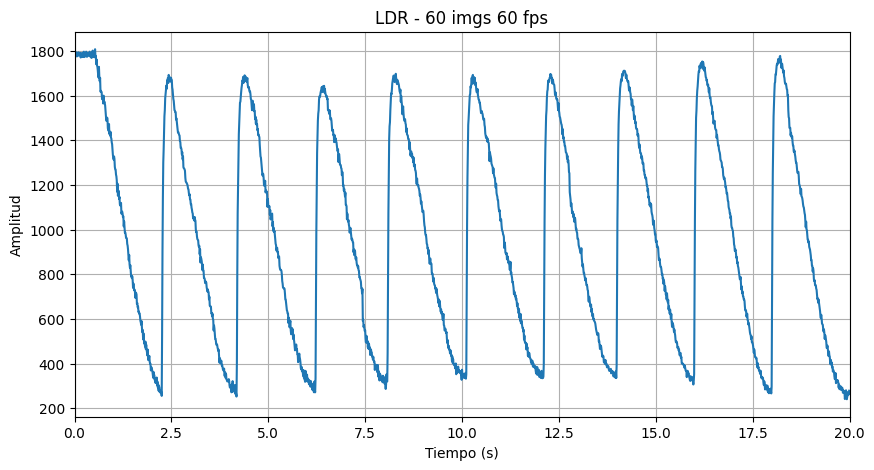

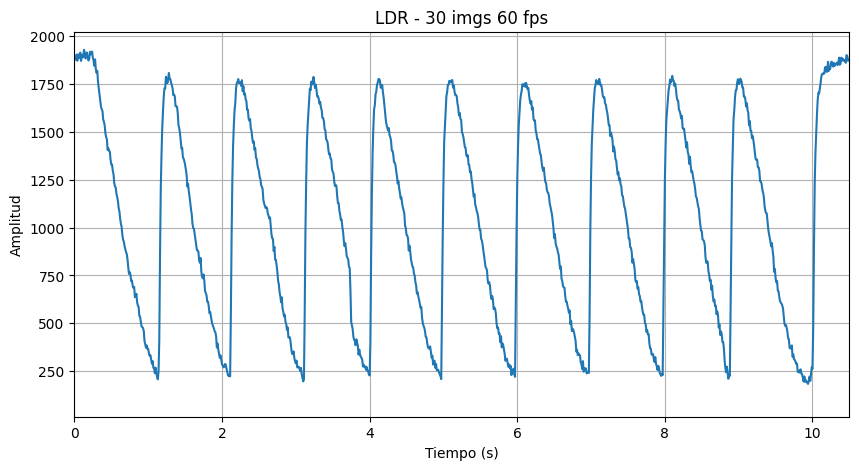

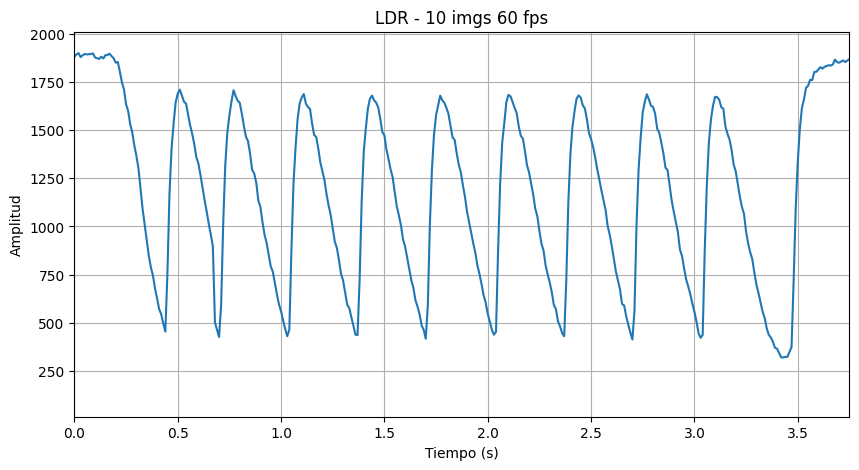

In [91]:
# Parámetros
fs = 100  # frecuencia de muestreo [Hz]
tc1 = 12  # tiempo de corte 1 [segundos]
tc2 = 32  # tiempo de corte 2 [segundos]
t1 = tc1 * fs  # número de muestra en t = tc1 [muestras]
t2 = tc2 * fs  # número de muestra en t = tc2 [muestras]

# Acotamos la primera señal
ldr_acot = ldr_fs100Hz_60imgs_60fps[t1:t2]  # tramo útil de la señal
t_acot = np.arange(len(ldr_acot)) / fs  # recalculamos el vector de tiempo

# Ajustar el tiempo del primer gráfico para que comience en 0
t_acotado_0 = t_acot - t_acot[0]

# Función para graficar (debe estar definida previamente)
def graficar_t_VS_muestras(t, señal, xlabel, xlim, ylabel, titulo, grid):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot(t, señal)
    plt.xlabel(xlabel)
    plt.xlim(xlim)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(grid)
    plt.show()

# Graficar la primera señal ajustada al tiempo 0
graficar_t_VS_muestras(t_acotado_0,
                       ldr_acot,
                       xlabel='Tiempo (s)',
                       xlim=(0, tc2 - tc1),  # ajustar los límites de x
                       ylabel='Amplitud',
                       titulo='LDR - 60 imgs 60 fps',
                       grid=True
                       )

# Graficar la segunda señal ajustada al tiempo 0
t_acotado_3 = tiempos[3] - 9.5  # restar el valor inicial de xlim al tiempo
graficar_t_VS_muestras(t_acotado_3,
                       seniales[3],
                       xlabel='Tiempo (s)',
                       xlim=(0, 10.5),  # ajustado a tiempo 0
                       ylabel='Amplitud',
                       titulo='LDR - 30 imgs 60 fps',
                       grid=True
                       )

# Graficar la tercera señal ajustada al tiempo 0
t_acotado_5 = tiempos[5] - 9.25  # restar el valor inicial de xlim al tiempo
graficar_t_VS_muestras(t_acotado_5,
                       seniales[5],
                       xlabel='Tiempo (s)',
                       xlim=(0, 3.75),  # ajustado a tiempo 0
                       ylabel='Amplitud',
                       titulo='LDR - 10 imgs 60 fps',
                       grid=True
                       )

## Graficamos las muestras tomadas a Fs = 500 Hz

4950
2500
900


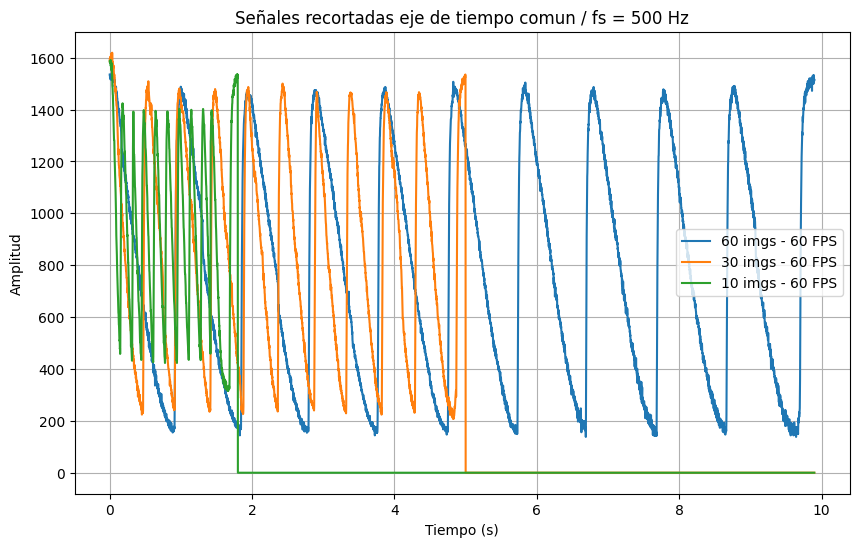

In [92]:
# Seniales a utilizar
seniales_utiles = [ldr_fs500Hz_60imgs_60fps, ldr_fs500Hz_30imgs_60fps, ldr_fs500Hz_10imgs_60fps]

# Frecuencia de muestreo
fs = 500

# Intervalo de tiempo
delta_t = 1/fs

"""# Graficar la señal
plt.figure(figsize=(10, 4))
plt.plot(seniales_utiles[2], label='LDR Signal')
plt.title('Señal del LDR')
plt.xlabel('Número de muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()"""

# Recortamos en un determinado numero de muestra la señal

seniales_utiles[0] = seniales_utiles[0][2000:6950]
seniales_utiles[1] = seniales_utiles[1][2400:4900]
seniales_utiles[2] = seniales_utiles[2][2000:2900]

"""# Graficamos la senial recortada
plt.figure(figsize=(10, 4))
plt.plot(seniales_utiles[2], label='LDR Signal')
plt.title('Señal del LDR')
plt.xlabel('Número de muestra')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()"""

# Longitud seniales
print(len(seniales_utiles[0]))
print(len(seniales_utiles[1]))
print(len(seniales_utiles[2]))

# Array de tiempos correspondientes a cada senial
t = np.arange(0, len(seniales_utiles[2])*delta_t, delta_t)

# Encontrar la senial que posee mayor longitud
max_length = max(len(seniales_utiles[0]), len(seniales_utiles[1]), len(seniales_utiles[2]))

# Rellenamos las señales más cortas con ceros
seniales_utiles[0] = np.pad(seniales_utiles[0], (0, max_length - len(seniales_utiles[0])), 'constant')
seniales_utiles[1] = np.pad(seniales_utiles[1], (0, max_length - len(seniales_utiles[1])), 'constant')
seniales_utiles[2] = np.pad(seniales_utiles[2], (0, max_length - len(seniales_utiles[2])), 'constant')

t = np.arange(0, max_length * delta_t, delta_t)

# Graficar las señales en un solo gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, seniales_utiles[0], label='60 imgs - 60 FPS')
plt.plot(t, seniales_utiles[1], label='30 imgs - 60 FPS')
plt.plot(t, seniales_utiles[2], label='10 imgs - 60 FPS')

# Etiquetas y leyendas
plt.title('Señales recortadas eje de tiempo comun / fs = 500 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Se creó un multigrafico para poder realizar una comparativa de que es lo que ocurre con cada señal, cuando lo que se modifica es la cantidad de imágenes en el video.

Se puede observar que a 60 imágenes-60 fps, la señal tiene una duración de 20 segundos, pero al ir disminuyendo la cantidad de imágenes, también se va a modificar la duración de la señal.

Esto claramente también ocurre con las otras dos señales. Para la de 30 imágenes-60 fps, se puede observar que la duración de la señal se redujo exactamente a la mitad. Para la señal de 10 imágenes-60 fps la duración máxima fue de 3,5 segundos aproximadamente (casi un tercio de la duración de la señal 30 imágenes-60 fps).

Tambien es importante destacar que la secuencia del video del cual se tomó la señal, va de blanco hacia negro 10 veces. Esto va a afectar visualmente porque vamos a notar un gráfico tipo “diente de sierra”, donde cada pico superior puede analizarse como el inicio de la repetición, y cada pico inferior puede analizarse como el final de la repetición.

# Transformada de Fourier

Se aplica la transformada de Fourier a las 3 señales para poder analizar que es lo que ocurre con sus frecuencias, cuales son sus compontentes frecuenciales y a que se deben. Recordamos que la transformada de fourier convierte la señal del dominio del tiempo al dominio de la frecuencia. Los parámetros que se tienen en cuenta para realizar la transformada de Fourier son: Fs (frecuencia de muestreo) y la señal (a la que se le desea aplicar la FFT).
En este caso, es necesario aplicarlo a las 3 señales porque entre sí se diferencian por la cantidad de imágenes que poseen. Esto puede afectar a las componentes frecuenciales.

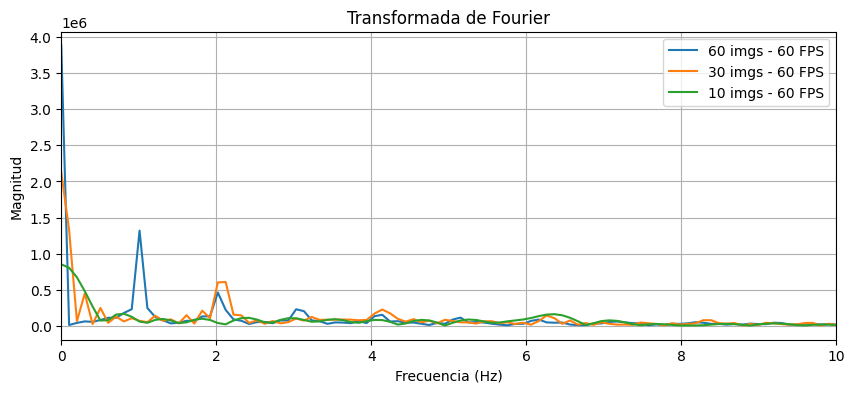

In [93]:
# Calculamos FFT de ka senial
"""
fft(seniales_utiles[0],
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - 60 imgs - 60 FPS',
    grid=True)
fft(seniales_utiles[1],
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - 30 imgs - 60 FPS',
    grid=True)
fft(seniales_utiles[2],
    fs,
    xlim=(0,5),
    ylim=None,
    xlabel='Frecuencia (Hz)',
    ylabel='Magnitud',
    titulo='FFT - 20 imgs - 60 FPS',
    grid=True)
"""
fft(seniales_utiles,
    fs,
    labels = ['60 imgs - 60 FPS', '30 imgs - 60 FPS', '10 imgs - 60 FPS'],
    xlim=(0,10),
    ylim=None)

***Análisis del gráfico FFT***  
1. Podemos apreciar un pico cerca de la frecuencia de 0 Hz, esto puede representar la parte casi-contínua que obtuvimos antes y después de la muestra como tal.  
2. Es posible visualizar que, existe una frecuencia fundamental en 1 Hz y lugo le suceden sus respectivos armónicos cada un Hert.

#Bibliografía

https://www.luisllamas.es/medir-nivel-luz-con-arduino-y-fotoresistencia-ldr/